# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [184]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [185]:
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [186]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Added the time variable to use with time.gmtime to calculate the date
        city_time = time.gmtime(city_weather['dt'])
        city_date = f"{city_time[0]}-{city_time[1]}-{city_time[2]}"

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [187]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [188]:
# Temp is returned in Kelvin. Minus 273.15 to get temp in celsius
city_data_df['Max Temp'] = round(city_data_df['Max Temp'] - 273.15, 2)

In [189]:
# Display sample data
city_data_df.head()

In [190]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [191]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova vicosa,-17.8919,-39.3719,32.05,49,29,2.73,BR,2024-2-11
1,mao,39.8885,4.2658,14.31,47,20,9.77,ES,2024-2-11
2,ogoja,6.6547,8.7976,38.68,15,40,2.59,NG,2024-2-11
3,portland,45.5234,-122.6762,7.89,92,100,4.12,US,2024-2-11
4,longyearbyen,78.2186,15.6401,-7.09,79,40,1.03,SJ,2024-2-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

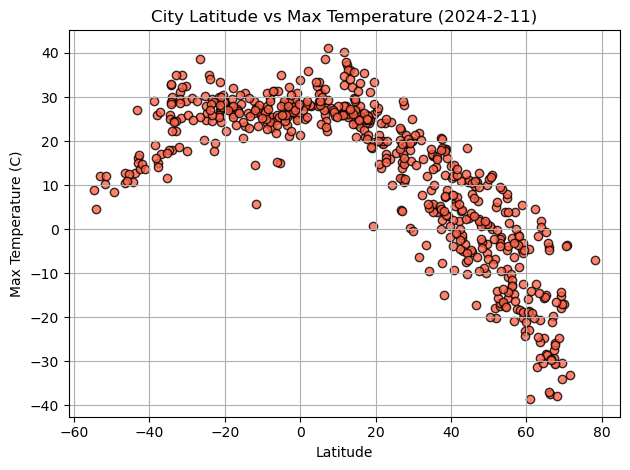

In [192]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
x_label = city_data_df['Lat']
y_label = city_data_df['Max Temp']
plt.scatter(x_label, y_label, c = 'tomato', alpha = 0.80, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Automatically added title date based on the information parsed from the api.
plt.title(f"City Latitude vs Max Temperature ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig1.png")
plt.show()

# Show plot
plt.show()

#### Latitude Vs. Humidity

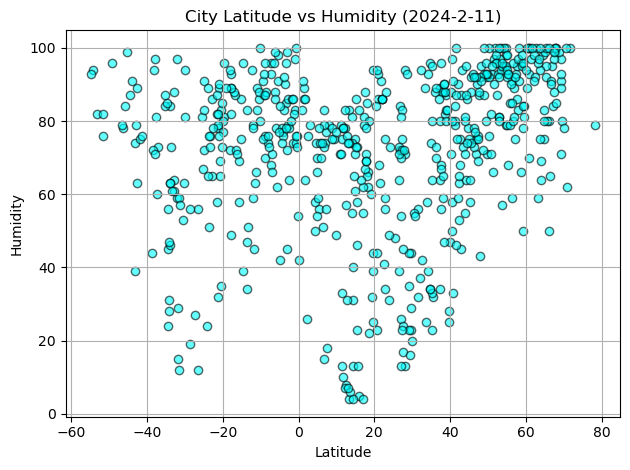

In [193]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
y_label = city_data_df['Humidity']
plt.scatter(x_label, y_label, c = 'cyan', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs Humidity ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

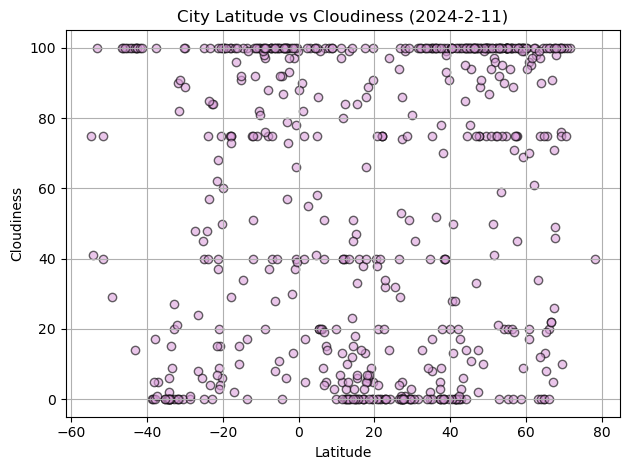

In [194]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure

y_label = city_data_df['Cloudiness']
plt.scatter(x_label, y_label, c = 'plum', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Cloudiness ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

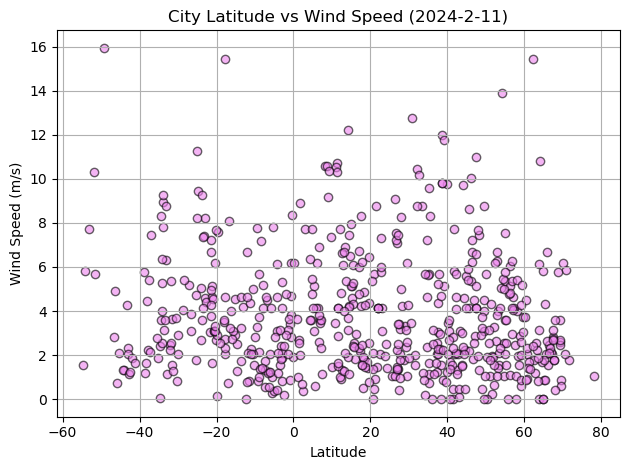

In [195]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure

y_label = city_data_df['Wind Speed']
plt.scatter(x_label, y_label, c = 'violet', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [196]:
# Define a function to create Linear Regression plots
def regress_func(xval, yval):
    
    plt.scatter(xval, yval, c = 'turquoise', edgecolors = 'black')
    slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.tight_layout()
    regression_correlation = round(rvalue**2, 3)
    plt.annotate(f"{regression_correlation}, {line_eq}", (0, 1), xycoords = 'axes fraction', fontsize=15,color="red")
    plt.plot(xval, regress_values, "r-")
    print(f"The r-value is: {rvalue**2}")
    plt.tight_layout()
    
    # get the name of the reference column then remove spaces to keep the format tight. use these figures to dynamically name the output files.
    xtitle = xval.name.replace(" ", "")
    ytitle = yval.name.replace(" ", "")

    if xval[0] >= 0:
        plt.savefig(f"output_data/north_{xtitle}_vs_{ytitle}")
    
    else:
        plt.savefig(f"output_data/south_{xtitle}_vs_{ytitle}")
        
    plt.show()

In [197]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].reset_index(drop = True)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mao,39.8885,4.2658,14.31,47,20,9.77,ES,2024-2-11
1,ogoja,6.6547,8.7976,38.68,15,40,2.59,NG,2024-2-11
2,portland,45.5234,-122.6762,7.89,92,100,4.12,US,2024-2-11
3,longyearbyen,78.2186,15.6401,-7.09,79,40,1.03,SJ,2024-2-11
4,tiksi,71.6872,128.8694,-33.07,100,100,1.77,RU,2024-2-11
...,...,...,...,...,...,...,...,...,...
399,kargopol',61.5071,38.9456,-19.09,100,97,1.37,RU,2024-2-11
400,botou,38.0667,116.5667,4.19,59,0,2.97,CN,2024-2-11
401,maholi,27.6667,80.4667,16.04,45,0,1.76,IN,2024-2-11
402,spring creek,40.7266,-115.5859,-9.17,91,50,1.37,US,2024-2-11


In [198]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].reset_index(drop = True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova vicosa,-17.8919,-39.3719,32.05,49,29,2.73,BR,2024-2-11
1,waitangi,-43.9535,-176.5597,12.68,91,100,1.34,NZ,2024-2-11
2,lebu,-37.6167,-73.6500,15.04,81,100,5.40,CL,2024-2-11
3,minas de marcona,-15.2119,-75.1103,20.59,75,91,4.55,PE,2024-2-11
4,puerto natales,-51.7236,-72.4875,10.25,76,75,10.29,CL,2024-2-11


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7930157244624679


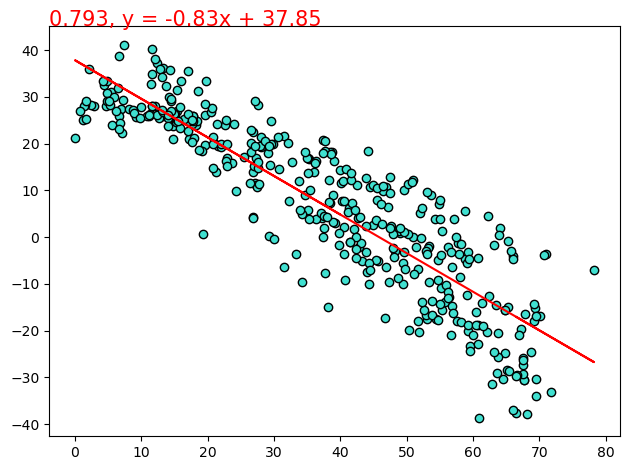

In [199]:
# Linear regression on Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.23842226019213641


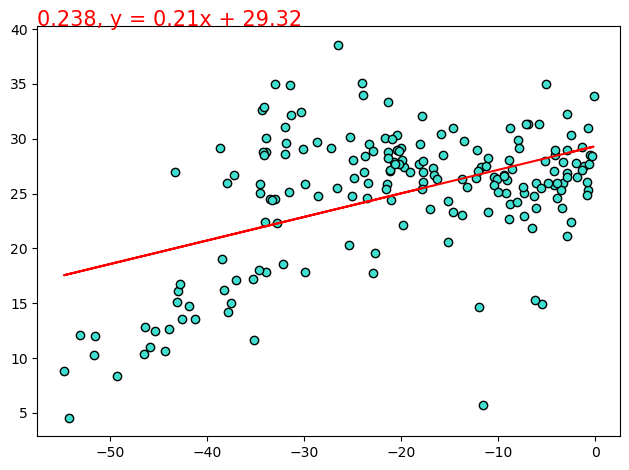

In [200]:
# Linear regression on Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Latitude vs Max Temp,**
**Discussion about the linear relationship:** 

Analysing both sets of data for the Northern and Southern hemisphere reveals a trend for the temperature to increase as we approach the equator. The trend is stronger in the Northern hemisphere, with a correlation value of ~0.79. This correlation value being closer to 1 indicates that a majority of cities in the Northern and Southern hemisphere follow this trend. These linear regression plot would be a good predictor of expected temperature as you move towards ot away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23708071683571885


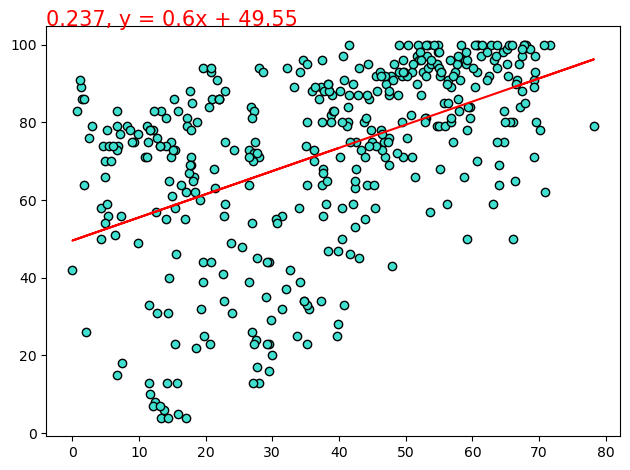

In [201]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.031750820813482


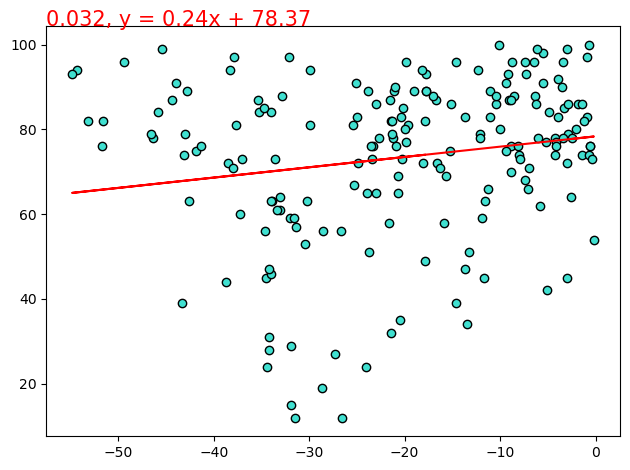

In [202]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Latitude vs Humidity,**
**Discussion about the linear relationship:** 

Analysing and comparing the difference between the Northern and Southern hemisphere reveals a trend for the humidity to increase as you approach the equator from the south, then increase further as you move further away to the north. The trend was weak for both hemisphere datasets, with correlation values below 0.24 for each. This indicates that there is a large number of cities which do not follow this trend. This information suggests that there are different factors which influence the humidity more than the latitude. One would not trust either of these linear regression plots to accurately predict the humidity of cities either side of the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11241385577225554


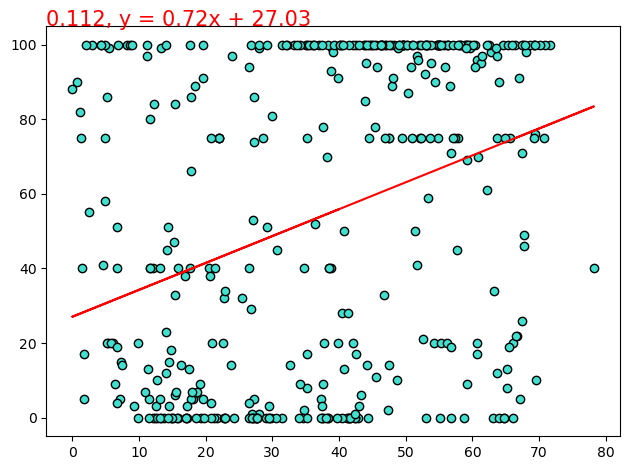

In [203]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.08576307350862908


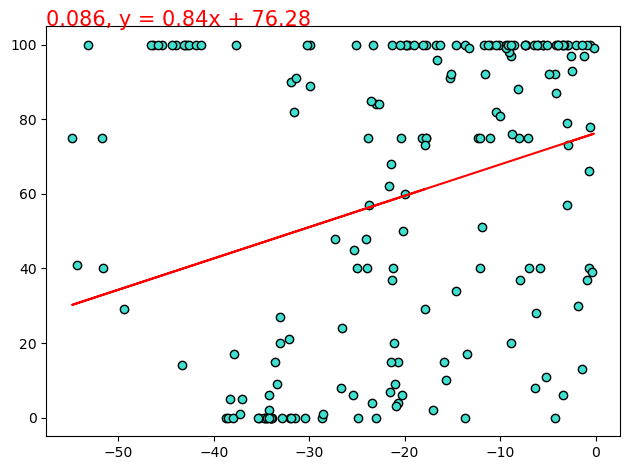

In [204]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Latitude vs Cloudiness.**
**Discussion about the linear relationship:** 

Analysing and comparing the difference between the Northern and Southern hemisphere reveals a trend for the cloudiness to increase as you approach the equator from the south, then increase further as you move further away to the north. The correlation values are incredibly weak for both hemispheres. This indicates that an overwhelming majority of cities do not follow this pattern and that there are other factors which influence the cloudiness to a more signifcant degree. One would not trust either of these linear regression plots to accurately predict the cloudiness of cities either side of the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02800519233702141


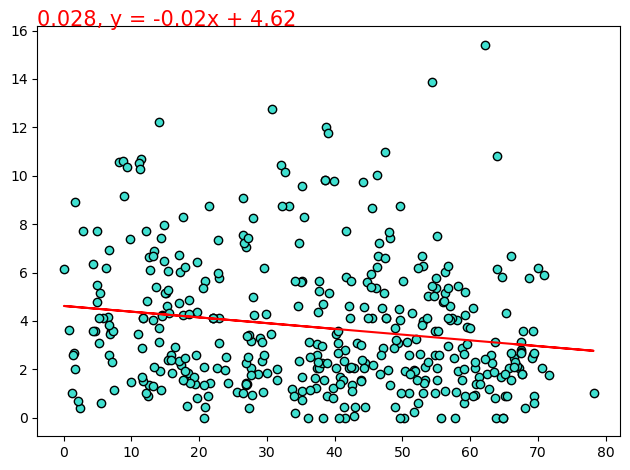

In [205]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.03922082336040954


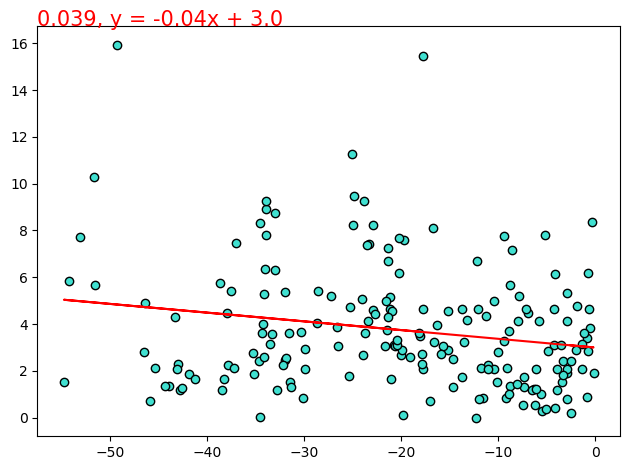

In [206]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Latitude vs Windspeed,**
**Discussion about the linear relationship:** 

Analysing and comparing the difference between the Northern and Southern hemisphere reveals a trend for the windspeed to decrease as you approach the equator from the south, then increase further as you move further away to the north. The correlation values are incredibly weak, almost non-existent for both hemispheres. This indicates that an overwhelming majority of cities do not follow this pattern and that there are other factors which influence the windspeed to a more signifcant degree. One would not trust either of these linear regression plots to accurately predict the windspeed of cities either side of the equator.